<a href="https://colab.research.google.com/github/sara-asadi/UTKFace-classification/blob/main/NN_CA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/UTKFace.tar.gz" .

In [ ]:
!tar xvzf UTKFace.tar.gz

Streaming output truncated to the last 5000 lines.
UTKFace/33_1_0_20170111182452825.jpg.chip.jpg
UTKFace/26_1_1_20170116024053194.jpg.chip.jpg
UTKFace/25_1_0_20170109213232182.jpg.chip.jpg
UTKFace/28_1_1_20170112234526480.jpg.chip.jpg
UTKFace/57_0_0_20170117191704100.jpg.chip.jpg
UTKFace/27_1_1_20170117193211345.jpg.chip.jpg
UTKFace/46_1_1_20170116161237892.jpg.chip.jpg
UTKFace/24_0_2_20170116171647508.jpg.chip.jpg
UTKFace/42_1_1_20170113005712902.jpg.chip.jpg
UTKFace/25_1_1_20170116001337504.jpg.chip.jpg
UTKFace/40_1_0_20170116222110661.jpg.chip.jpg
UTKFace/50_1_0_20170109012257664.jpg.chip.jpg
UTKFace/26_1_3_20170104235421282.jpg.chip.jpg
UTKFace/7_0_0_20170110215711115.jpg.chip.jpg
UTKFace/1_1_2_20161219155353413.jpg.chip.jpg
UTKFace/26_0_1_20170117195651493.jpg.chip.jpg
UTKFace/7_0_0_20170110215648859.jpg.chip.jpg
UTKFace/64_0_0_20170117155540137.jpg.chip.jpg
UTKFace/48_0_0_20170109004813150.jpg.chip.jpg
UTKFace/39_0_0_20170103183230555.jpg.chip.jpg
UTKFace/45_0_1_20170117190019363

In [ ]:
from tensorflow.keras import *
from tensorflow.keras.utils import *
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import tensorboard
import os

In [ ]:
img_path = list()
Genders = list()

path = "/content/UTKFace"

for img in os.listdir(path):
  temp = img.split('.')
  if len(temp[0].split('_')) == 4:
    img_path.append(os.path.join(path, img))
    Age, Gender, Race, Date = temp[0].split('_')
    Genders.append(int(Gender))
  else:
    continue

classes_labels = {0:"Male", 1:"Female"}
GendersStr = [classes_labels[i] for i in Genders]
Genders = [str(to_categorical(i, len(classes_labels))) for i in Genders]

df = pd.DataFrame({
    'image': img_path,
    'Gender':Genders,
    'GenderStr':GendersStr
})


Female


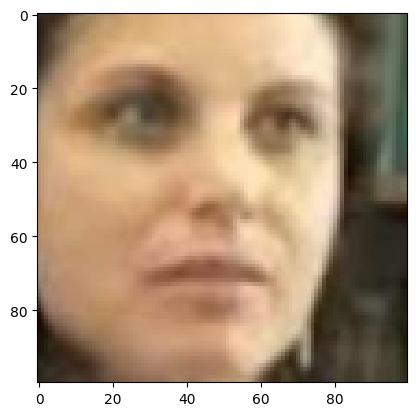

Male


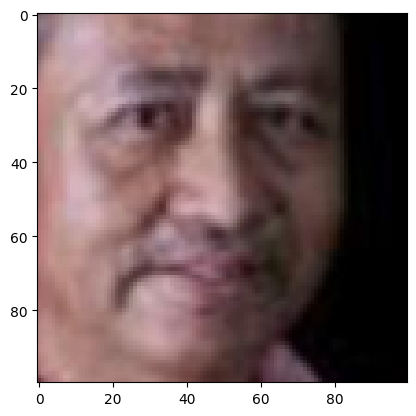

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

samples = df.groupby('GenderStr').sample()
for i in range(len(samples)):
  img_addr = samples['image'].iloc[i]
  image = Image.open(img_addr)
  image.thumbnail((100, 100), Image.Resampling.LANCZOS)
  plt.figure()
  plt.imshow(np.asarray(image))
  print(samples['GenderStr'].iloc[i])
  plt.show()

In [ ]:
#preprocessing images to scale form rgb to 0 to 1 and split the database for train and test
dataGenerator = preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0,
    validation_split = 0.3
)


In [ ]:
TrainDate = dataGenerator.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'Gender',
    target_size = (100, 100),
    color_mode = "grayscale",
    batch_size = 32,
    class_mode = "categorical",
    subset = "training",
    shuffle = False
)

Found 16594 validated image filenames belonging to 2 classes.


In [ ]:
TestDate = dataGenerator.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'Gender',
    target_size = (100, 100),
    color_mode = "grayscale",
    batch_size = 32,
    class_mode = "categorical",
    subset = "validation",
    shuffle = False
)

Found 7111 validated image filenames belonging to 2 classes.


In [ ]:
input = layers.Input(shape=(100, 100, 1))
# regularizers.l2(l2=0.0001)
output = layers.Flatten()(input)
output = layers.Dense(1024, activation="relu")(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(512, activation="sigmoid")(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(2, activation="softmax")(output)


In [ ]:
model = models.Model(inputs= input, outputs= output)

In [ ]:
# model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
# model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy"])
# model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.5), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100, 100, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      10,241,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,766,850 (41.07 MB)

 Trainable params: 10,766,850 (41.07 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(TrainDate, validation_data=TestDate, epochs=20, batch_size=32)

Epoch 1/20
519/519 ━━━━━━━━━━━━━━━━━━━━ 84s 161ms/step - accuracy: 0.8430 - loss: 0.3417 - val_accuracy: 0.8481 - val_loss: 0.3385
Epoch 2/20
519/519 ━━━━━━━━━━━━━━━━━━━━ 85s 163ms/step - accuracy: 0.8432 - loss: 0.3364 - val_accuracy: 0.8355 - val_loss: 0.3639
Epoch 3/20
519/519 ━━━━━━━━━━━━━━━━━━━━ 139s 158ms/step - accuracy: 0.8444 - loss: 0.3380 - val_accuracy: 0.8352 - val_loss: 0.3796
Epoch 4/20
519/519 ━━━━━━━━━━━━━━━━━━━━ 82s 158ms/step - accuracy: 0.8419 - loss: 0.3430 - val_accuracy: 0.8429 - val_loss: 0.3534
Epoch 5/20
519/519 ━━━━━━━━━━━━━━━━━━━━ 83s 160ms/step - accuracy: 0.8502 - loss: 0.3230 - val_accuracy: 0.8225 - val_loss: 0.3887
Epoch 6/20
519/519 ━━━━━━━━━━━━━━━━━━━━ 143s 161ms/step - accuracy: 0.8489 - loss: 0.3252 - val_accuracy: 0.8414 - val_loss: 0.3520
Epoch 7/20
519/519 ━━━━━━━━━━━━━━━━━━━━ 140s 158ms/step - accuracy: 0.8518 - loss: 0.3254 - val_accuracy: 0.8536 - val_loss: 0.3339
Epoch 8/20
519/519 ━━━━━━━━━━━━━━━━━━━━ 88s 170ms/step - accuracy: 0.8545 - loss

In [32]:
test_loss, test_accuracy = model.evaluate(TestDate)

223/223 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8664 - loss: 0.3017


In [33]:
import plotly.graph_objects as go
plt.clf()
fig = go.Figure()
fig.add_trace(go.Scatter(
                    y=history.history['accuracy'],
                    name='accuracy'))
fig.update_layout(height=500,
                  width=700,
                  title='Accuracy for Gender feature',
                  xaxis_title='Epoch',
                  yaxis_title='Accuracy')

fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(
                    y=history.history['loss'],
                    name='loss'))
fig.update_layout(height=500,
                  width=700,
                  title='Loss for Gender feature',
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

<Figure size 640x480 with 0 Axes>

In [34]:
gender_pred = model.predict(TestDate)
predicted_class_indices=np.argmax(gender_pred,axis=1)


223/223 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step


In [35]:
import math
number_of_examples = len(TestDate.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * 32))

true_class_indices = []

for i in range(0,int(number_of_generator_calls)):
  true_class_indices.extend(np.argmax(np.array(TestDate[i][1]), axis=1))


In [36]:
from sklearn.metrics import classification_report

cr_gender = classification_report(true_class_indices, predicted_class_indices)
print(cr_gender)

              precision    recall  f1-score   support

           0       0.90      0.80      0.84      3402
           1       0.83      0.92      0.87      3709

    accuracy                           0.86      7111
   macro avg       0.86      0.86      0.86      7111
weighted avg       0.86      0.86      0.86      7111



In [ ]:
c = []
w = []
for i in range(len(TestDate.filenames)):
  if len(w) >= 10 and len(c) >= 10:
    break
  if true_class_indices[i] == predicted_class_indices[i]:
    c.append(TestDate.filenames[i])
  else:
    w.append({"fileName":TestDate.filenames[i], "correctTag":true_class_indices[i]})

In [ ]:
# print("Correct Ones:\n")
# print(len(c))
# for i in range(len(c)):
#   img_addr = c[i]
#   image = Image.open(img_addr).convert("L")
#   image.thumbnail((100, 100), Image.ANTIALIAS)
#   plt.figure()
#   plt.imshow(np.asarray(image), cmap='gray')
# plt.close()

Wrong Ones:



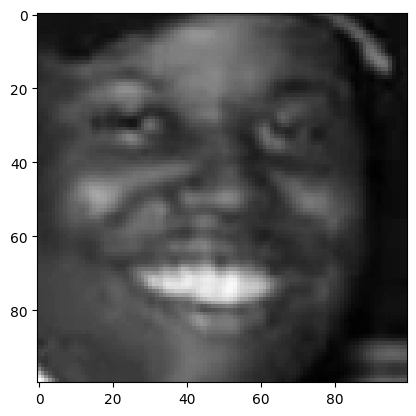

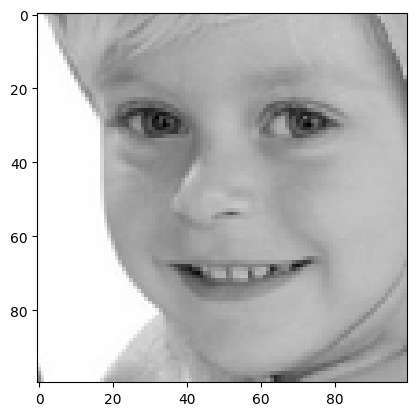

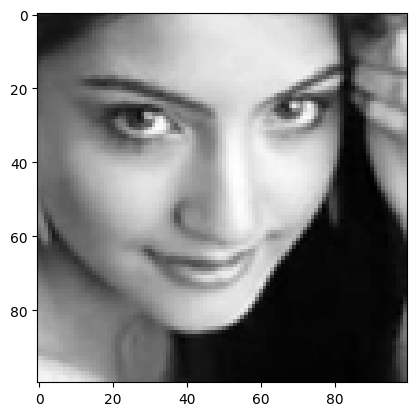

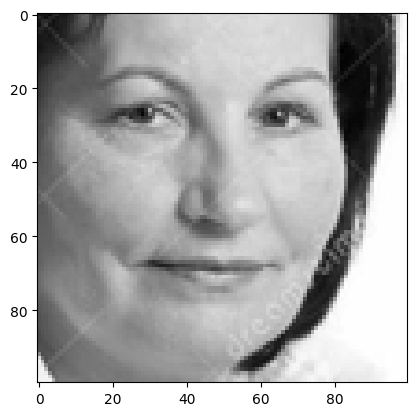

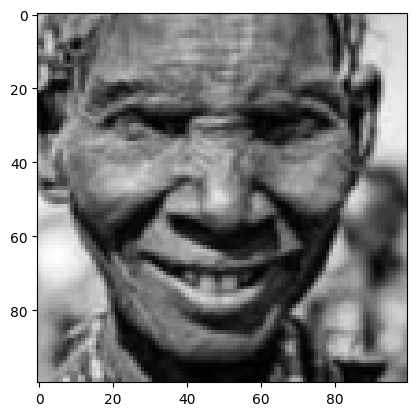

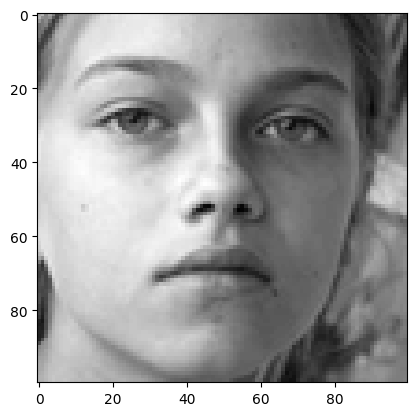

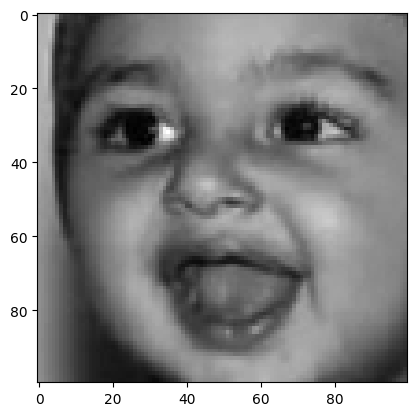

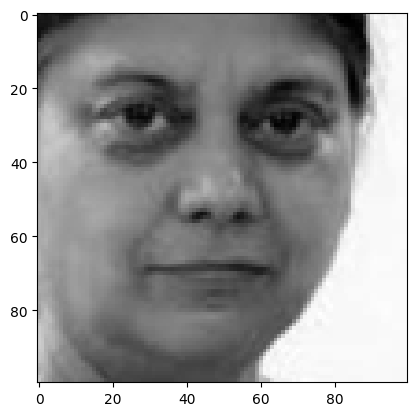

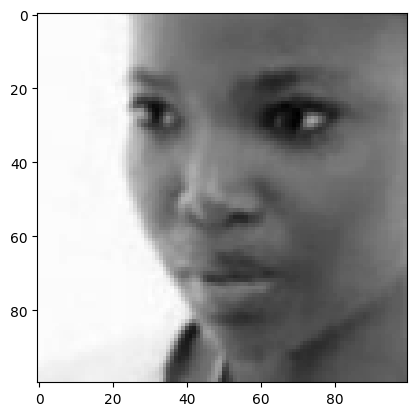

In [ ]:
print("Wrong Ones:\n")
for i in range(len(w)):
  img_addr = w[i]["fileName"]
  image = Image.open(img_addr).convert("L")
  image.thumbnail((100, 100), Image.Resampling.LANCZOS)
  plt.figure()
  plt.imshow(np.asarray(image), cmap='gray')
plt.close()


In [ ]:
# model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.5), loss="categorical_crossentropy", metrics=["accuracy"])